In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

We have loaded a dataset which has images of 28*28 pixels

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

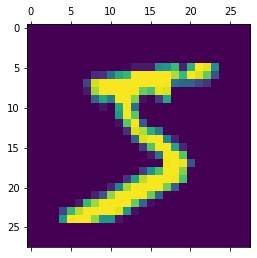

In [7]:
plt.matshow(X_train[0])

The value at any cell represents the the brightness of that cell in the image

Now we need to reshape our 2D matrix into a 1D array so that it can be used as the input layer for the neural network we will create

In [11]:
X_train=X_train/255
X_test=X_test/255
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [14]:
print(X_train_flattened.shape)

(60000, 784)


In [15]:
print(X_train_flattened[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Lets create a stack of layers for our neural network using keras

In [16]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4680 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9257


In [17]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 961us/step - loss: 0.2692 - accuracy: 0.9266


[0.2692170739173889, 0.9265999794006348]

In [18]:
predicted_y=model.predict(X_test_flattened)

In [19]:
print(predicted_y)

[[2.00238824e-02 4.96772429e-07 9.38487351e-02 ... 9.99796987e-01
  1.04463905e-01 6.68619633e-01]
 [3.14782709e-01 3.96025181e-03 9.99614716e-01 ... 1.17659409e-12
  1.50965482e-01 2.83730173e-09]
 [4.28080559e-04 9.93363321e-01 6.70467257e-01 ... 9.42302346e-02
  3.88512850e-01 3.59751284e-02]
 ...
 [3.48247886e-06 5.25275254e-06 2.19106674e-03 ... 1.99256450e-01
  5.21476746e-01 6.80899143e-01]
 [1.18063195e-04 2.17437744e-04 2.91168690e-04 ... 5.05499520e-05
  6.21251643e-01 9.09894006e-05]
 [7.11095333e-03 2.03999345e-10 3.13372403e-01 ... 1.03448814e-08
  1.46180391e-04 5.63439471e-07]]


For each value of i in predicted_y there will be ten values and we have to choose the maximum from it and the index choosen having the maximum value will be the predicted value

In [20]:
import numpy as np

In [25]:
np.argmax(predicted_y[0])
y_predicted=[]
for i in range(0,len(predicted_y)) :
    y_predicted.append(np.argmax(predicted_y[i]))
print(y_predicted)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

We can see our outcome using the confusion matrix

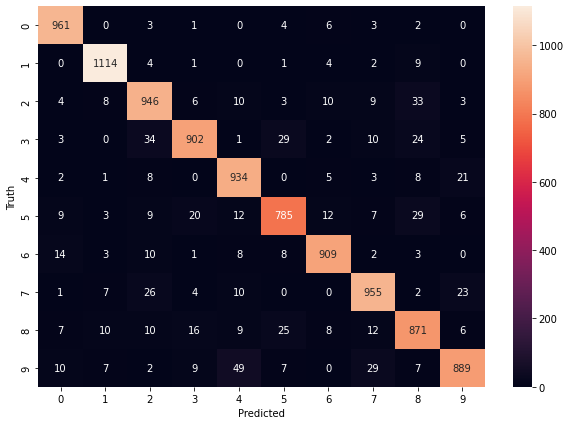

In [27]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Adding a hidden layer

In [35]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2741 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1229 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0866 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0651 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0508 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0417 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0333 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0274 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0231 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [41]:
model.evaluate(X_test_flattened,y_test)
predicted_y=model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9759


In [42]:
print(predicted_y.shape)
print(predicted_y)

(10000, 10)
[[4.0773582e-05 4.0772557e-04 9.0577692e-02 ... 9.9999976e-01
  1.5105605e-03 3.4327209e-03]
 [1.3008725e-05 9.6983230e-01 1.0000000e+00 ... 4.0233692e-07
  1.2784332e-02 2.1635660e-10]
 [1.5316042e-05 9.9918878e-01 4.4841766e-01 ... 4.4250840e-01
  4.3872711e-01 1.3548753e-05]
 ...
 [3.4930425e-10 2.1082002e-07 4.8984736e-09 ... 6.4376605e-01
  3.7996173e-03 7.5811207e-01]
 [5.5490527e-05 3.0895229e-09 3.4780132e-07 ... 7.3270298e-06
  3.1761843e-01 2.4170729e-05]
 [3.7051886e-02 7.9149245e-08 3.5907716e-02 ... 1.4451353e-10
  3.9276481e-04 2.8819503e-07]]


In [43]:
y_predicted=[]
for i in range(0,len(predicted_y)) :
    y_predicted.append(np.argmax(predicted_y[i]))
print(y_predicted)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

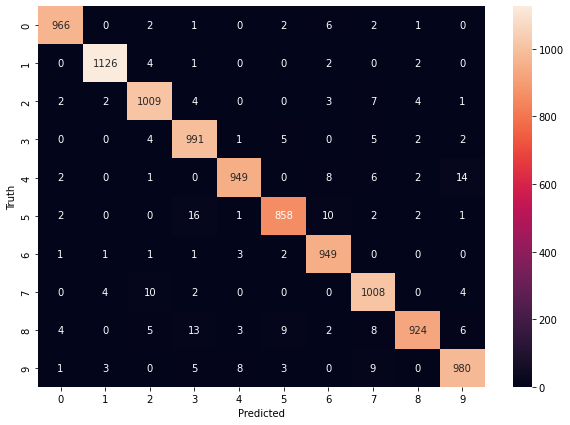

In [44]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()